# Problem Statement
- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

# Step 1 : Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
avocado_df = pd.read_csv("avocado.csv")
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Step 2 : Explore the Dataset

In [5]:
avocado_df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
# sort by date
avocado_df = avocado_df.sort_values("Date")

Text(0, 0.5, 'Average Price')

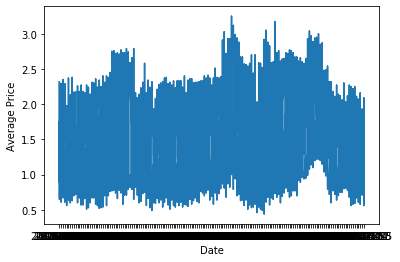

In [9]:
# Visualize the date versus the average price
plt.plot(figsize = (10, 10))
plt.plot(avocado_df["Date"], avocado_df["AveragePrice"])
plt.xlabel("Date")
plt.ylabel("Average Price")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

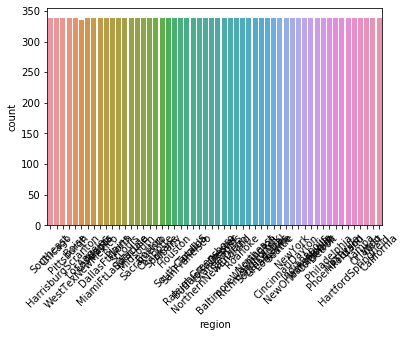

In [19]:
# Visualize the region count
plt.plot(figsize = (25,20))
sns.countplot(data = avocado_df, x = "region")
plt.xticks(rotation = 45)

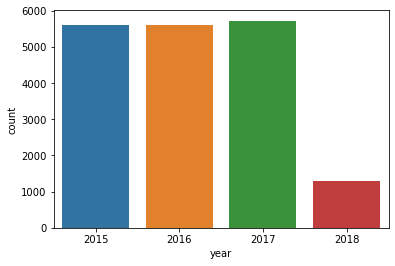

In [20]:
sns.countplot(x = "year", data = avocado_df)

In [22]:
# Prepare the dataset by extracting the date, averageprice information
avocado_prophet_df = avocado_df[["Date", "AveragePrice"]]
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


# Step 3 : Make Predictions

In [24]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {"Date" : "ds", "AveragePrice" : "y"})
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [25]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\cui\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [31]:
# Make the prediction
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498874,0.882317,1.887121,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
1,2015-01-04,1.498874,0.887516,1.868972,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
2,2015-01-04,1.498874,0.889516,1.890459,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
3,2015-01-04,1.498874,0.879302,1.857333,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
4,2015-01-04,1.498874,0.888160,1.852615,1.498874,1.498874,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,-0.113769,0.0,0.0,0.0,1.385105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.165762,0.557371,1.582556,0.974960,1.353739,-0.086441,-0.086441,-0.086441,-0.086441,-0.086441,-0.086441,0.0,0.0,0.0,1.079321
18610,2019-03-22,1.165039,0.568433,1.580125,0.973523,1.353540,-0.084749,-0.084749,-0.084749,-0.084749,-0.084749,-0.084749,0.0,0.0,0.0,1.080289
18611,2019-03-23,1.164315,0.563808,1.597221,0.972118,1.353708,-0.082782,-0.082782,-0.082782,-0.082782,-0.082782,-0.082782,0.0,0.0,0.0,1.081533
18612,2019-03-24,1.163592,0.590154,1.621536,0.970626,1.353984,-0.080560,-0.080560,-0.080560,-0.080560,-0.080560,-0.080560,0.0,0.0,0.0,1.083032


C:\Users\cui\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\cui\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


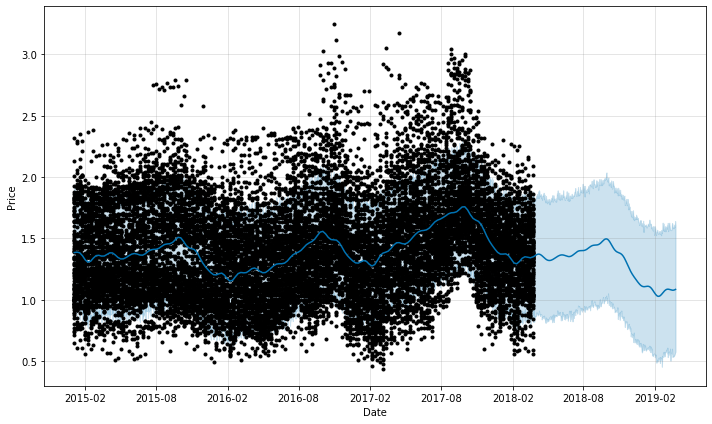

In [29]:
figure = m.plot(forecast, xlabel = "Date", ylabel = "Price")

C:\Users\cui\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\cui\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


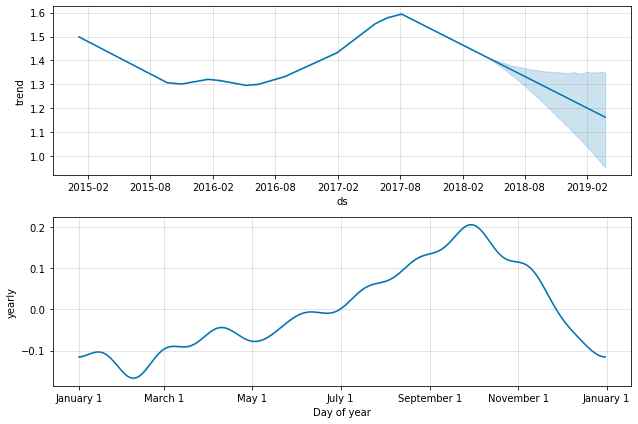

In [30]:
figure3 = m.plot_components(forecast)

In [33]:
# Select a specific region to make the predictions
avocado_df_sample = avocado_df[avocado_df["region"] == "West"]
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [34]:
avocado_df_sample = avocado_df_sample.sort_values("Date")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Average Price')

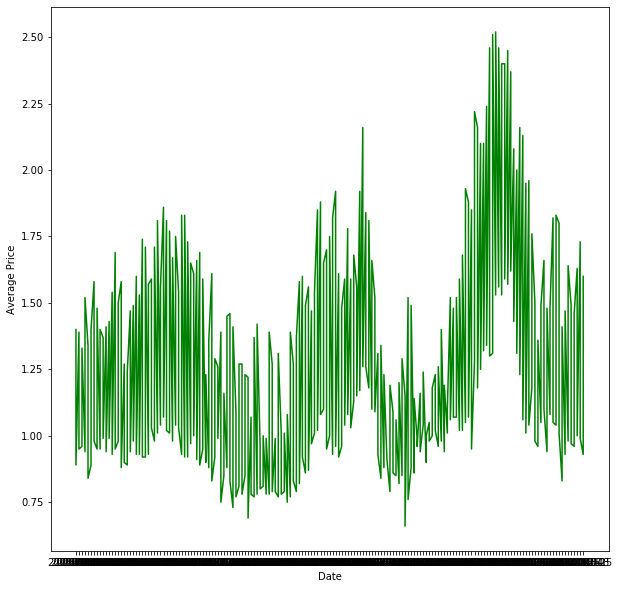

In [38]:
plt.figure(figsize = (10, 10))
plt.plot(avocado_df_sample["Date"], avocado_df_sample["AveragePrice"], "g")
plt.xlabel("Date")
plt.ylabel("Average Price")

In [41]:
# Prepare the dataset, extracting the "ds" and "y" columns
avocado_prophet_df_sample = avocado_df_sample[["Date", "AveragePrice"]]
avocado_prophet_df_sample = avocado_prophet_df_sample.rename(columns = {"Date" : "ds", "AveragePrice" : "y"})
avocado_prophet_df_sample

,ds,y
11881,2015-01-04,1.40
2755,2015-01-04,0.89
11880,2015-01-11,1.39
2754,2015-01-11,0.95
2753,2015-01-18,0.96
...,...,...
9104,2018-03-11,1.00
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [42]:
# Fit the model 
m1 = Prophet()
m1.fit(avocado_prophet_df_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\cui\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [43]:
# Make the prediction for the West region
future_West = m1.make_future_dataframe(periods = 365)
forecast_West = m1.predict(future_West)
forecast_West

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.287201,0.674119,1.514669,1.287201,1.287201,-0.187809,-0.187809,-0.187809,-0.187809,-0.187809,-0.187809,0.0,0.0,0.0,1.099392
1,2015-01-04,1.287201,0.711685,1.554420,1.287201,1.287201,-0.187809,-0.187809,-0.187809,-0.187809,-0.187809,-0.187809,0.0,0.0,0.0,1.099392
2,2015-01-11,1.284960,0.713800,1.549268,1.284960,1.284960,-0.171692,-0.171692,-0.171692,-0.171692,-0.171692,-0.171692,0.0,0.0,0.0,1.113268
3,2015-01-11,1.284960,0.681310,1.522883,1.284960,1.284960,-0.171692,-0.171692,-0.171692,-0.171692,-0.171692,-0.171692,0.0,0.0,0.0,1.113268
4,2015-01-18,1.282719,0.700554,1.536655,1.282719,1.282719,-0.163079,-0.163079,-0.163079,-0.163079,-0.163079,-0.163079,0.0,0.0,0.0,1.119640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2019-03-21,1.726000,1.112043,1.912524,1.692530,1.761627,-0.207322,-0.207322,-0.207322,-0.207322,-0.207322,-0.207322,0.0,0.0,0.0,1.518678
699,2019-03-22,1.726560,1.106823,1.936309,1.692854,1.762233,-0.202315,-0.202315,-0.202315,-0.202315,-0.202315,-0.202315,0.0,0.0,0.0,1.524246
700,2019-03-23,1.727120,1.094997,1.960922,1.693251,1.762786,-0.196740,-0.196740,-0.196740,-0.196740,-0.196740,-0.196740,0.0,0.0,0.0,1.530380
701,2019-03-24,1.727680,1.128874,1.971912,1.693673,1.763401,-0.190702,-0.190702,-0.190702,-0.190702,-0.190702,-0.190702,0.0,0.0,0.0,1.536978


C:\Users\cui\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\cui\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


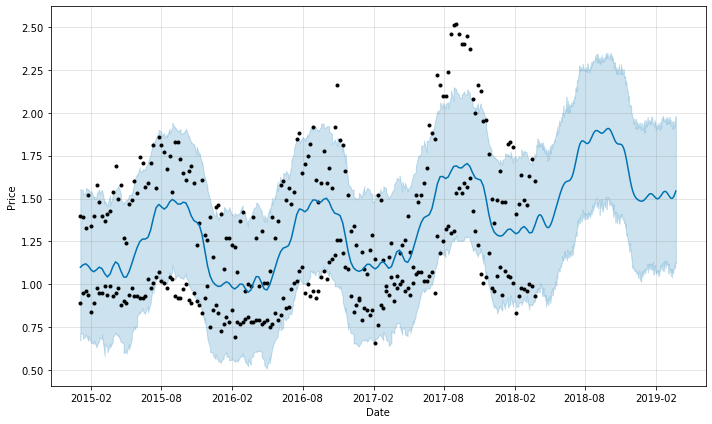

In [44]:
figure_West = m1.plot(forecast_West, xlabel = "Date", ylabel = "Price")

C:\Users\cui\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\cui\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


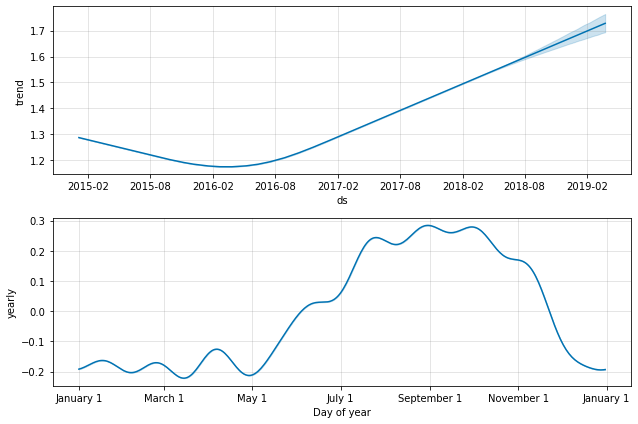

In [45]:
figure3_West = m1.plot_components(forecast_West)